In [10]:
import pandas as pd

# A. Стартап

*Недавно вы стали аналитиком в многообещающем стартапе Finnish dawn и теперь пытаетесь понять, действительно ли он так многообещающ. Перед вами график метрики Rolling Retention пользователей Finnish dawn.*

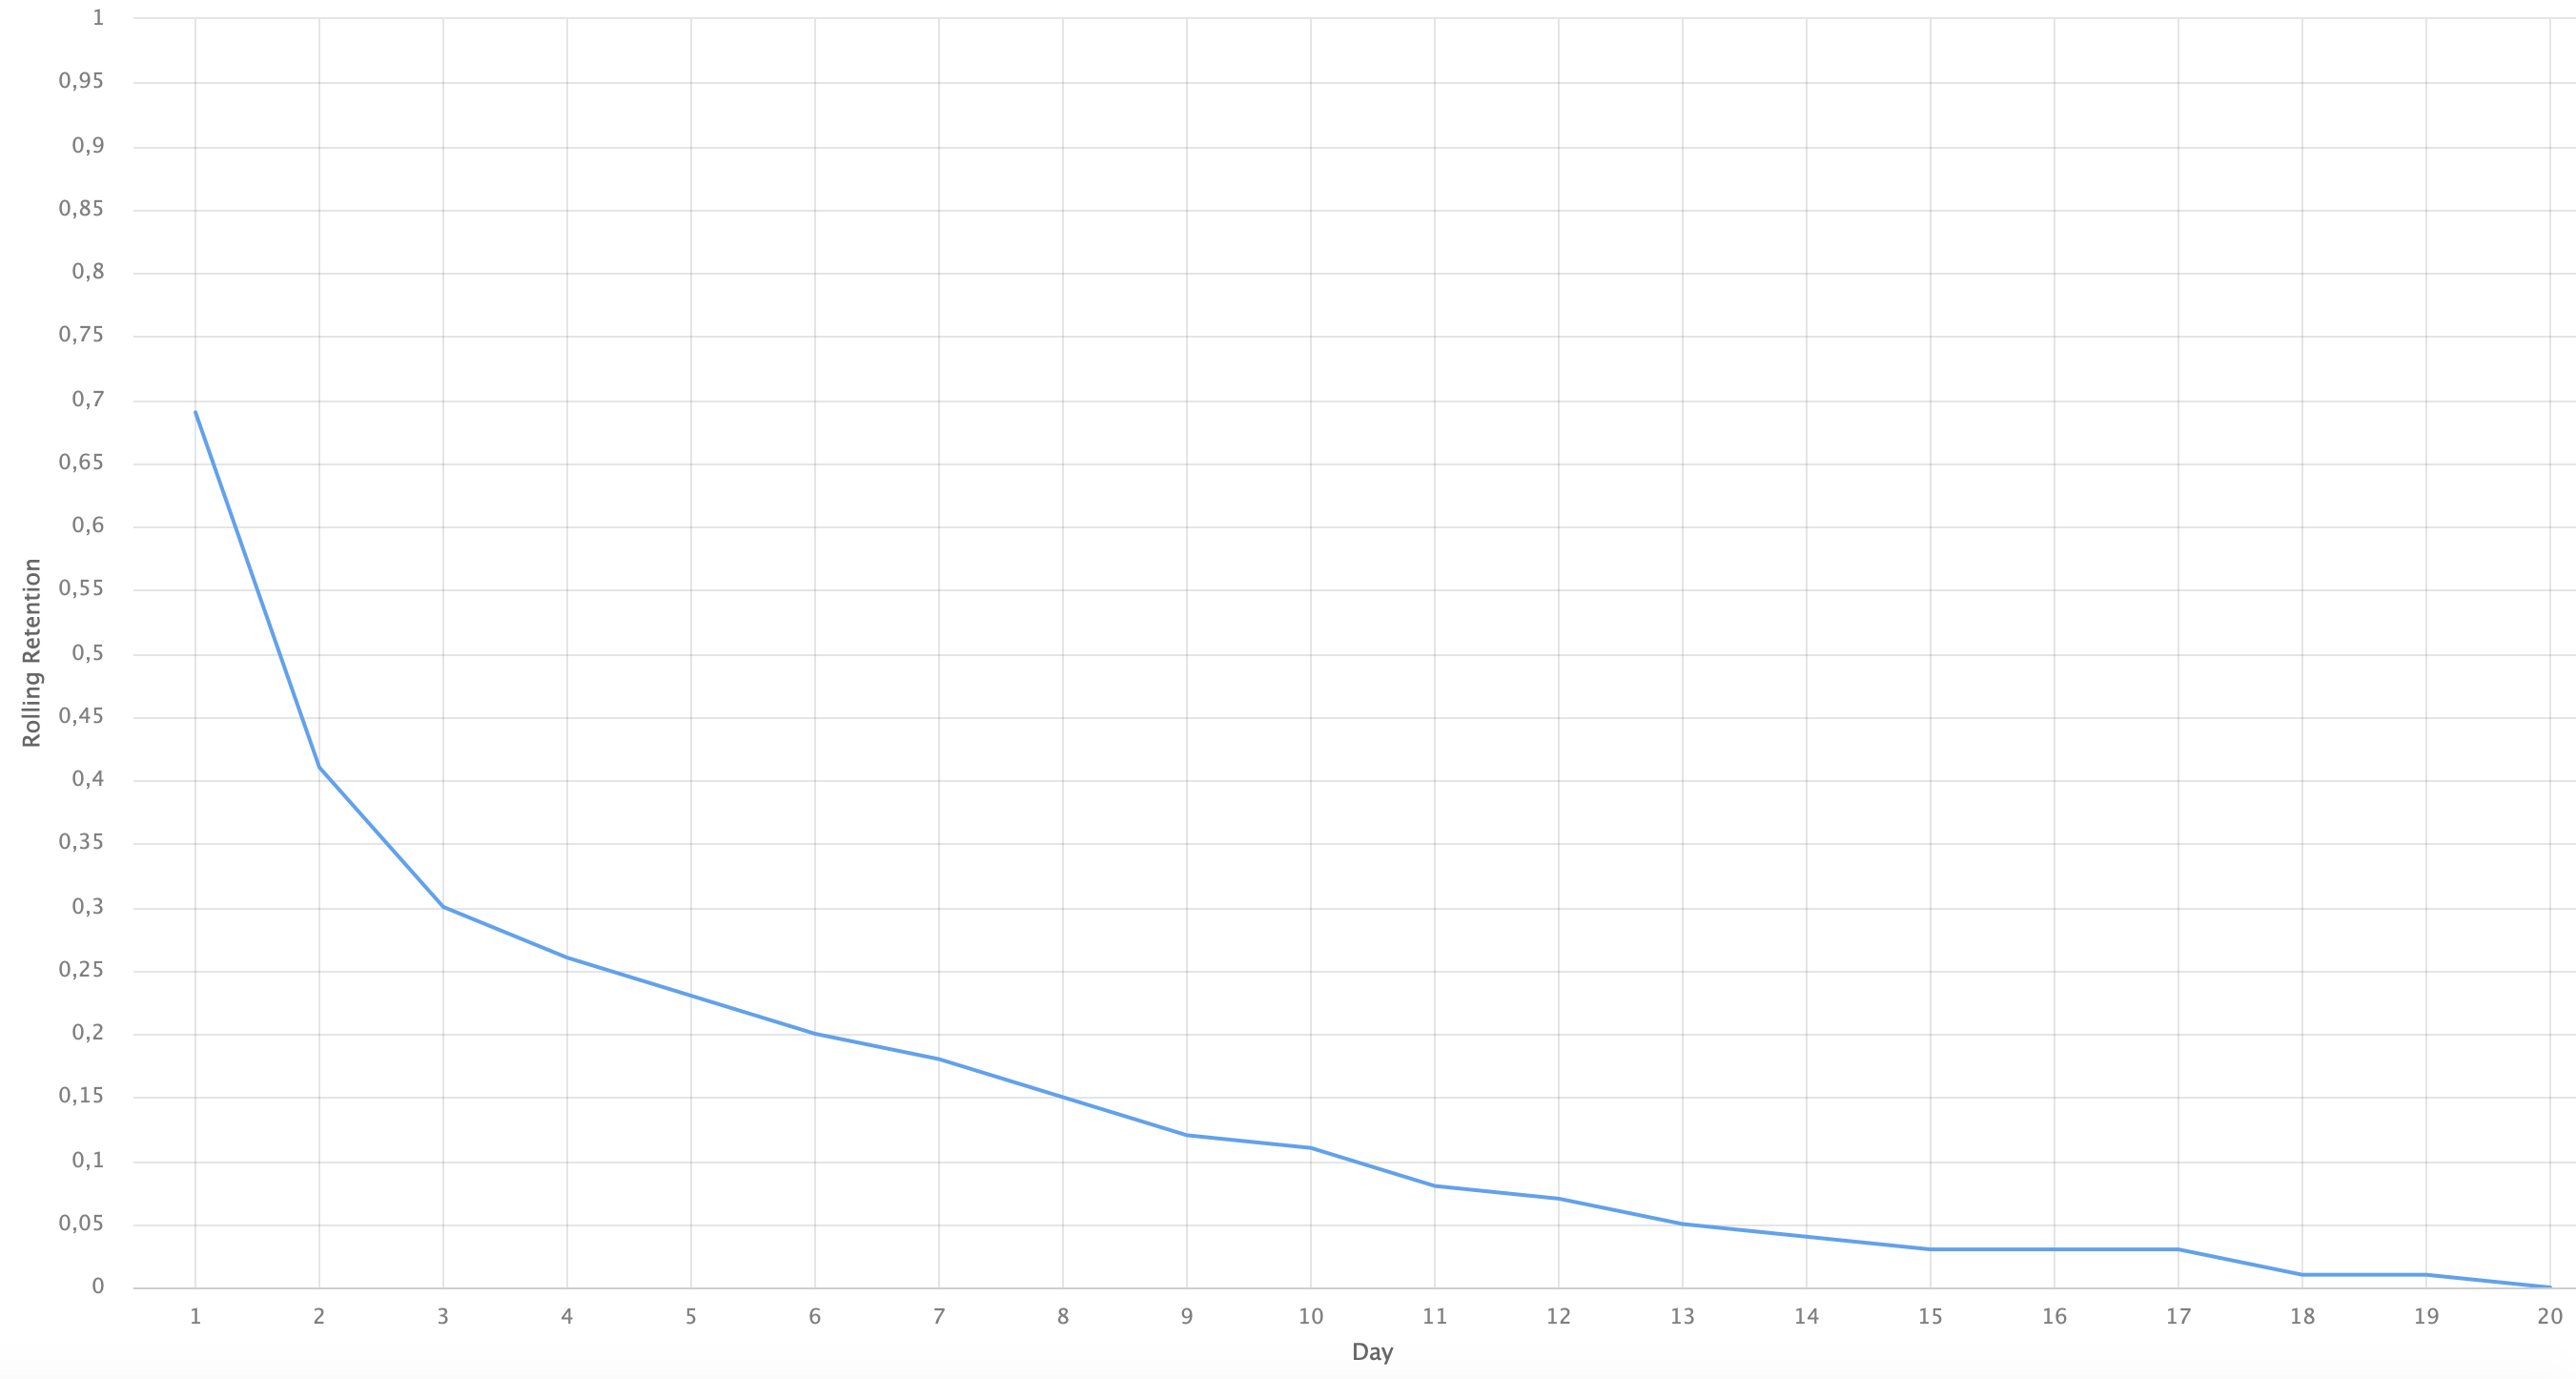

*Вычислите среднее по всем пользователям значение метрики Lifetime, округленное до ближайшего целого числа.*

Для перевода данных в табличный вид я использовал WebPlotDigitizer(https://apps.automeris.io/wpd/)

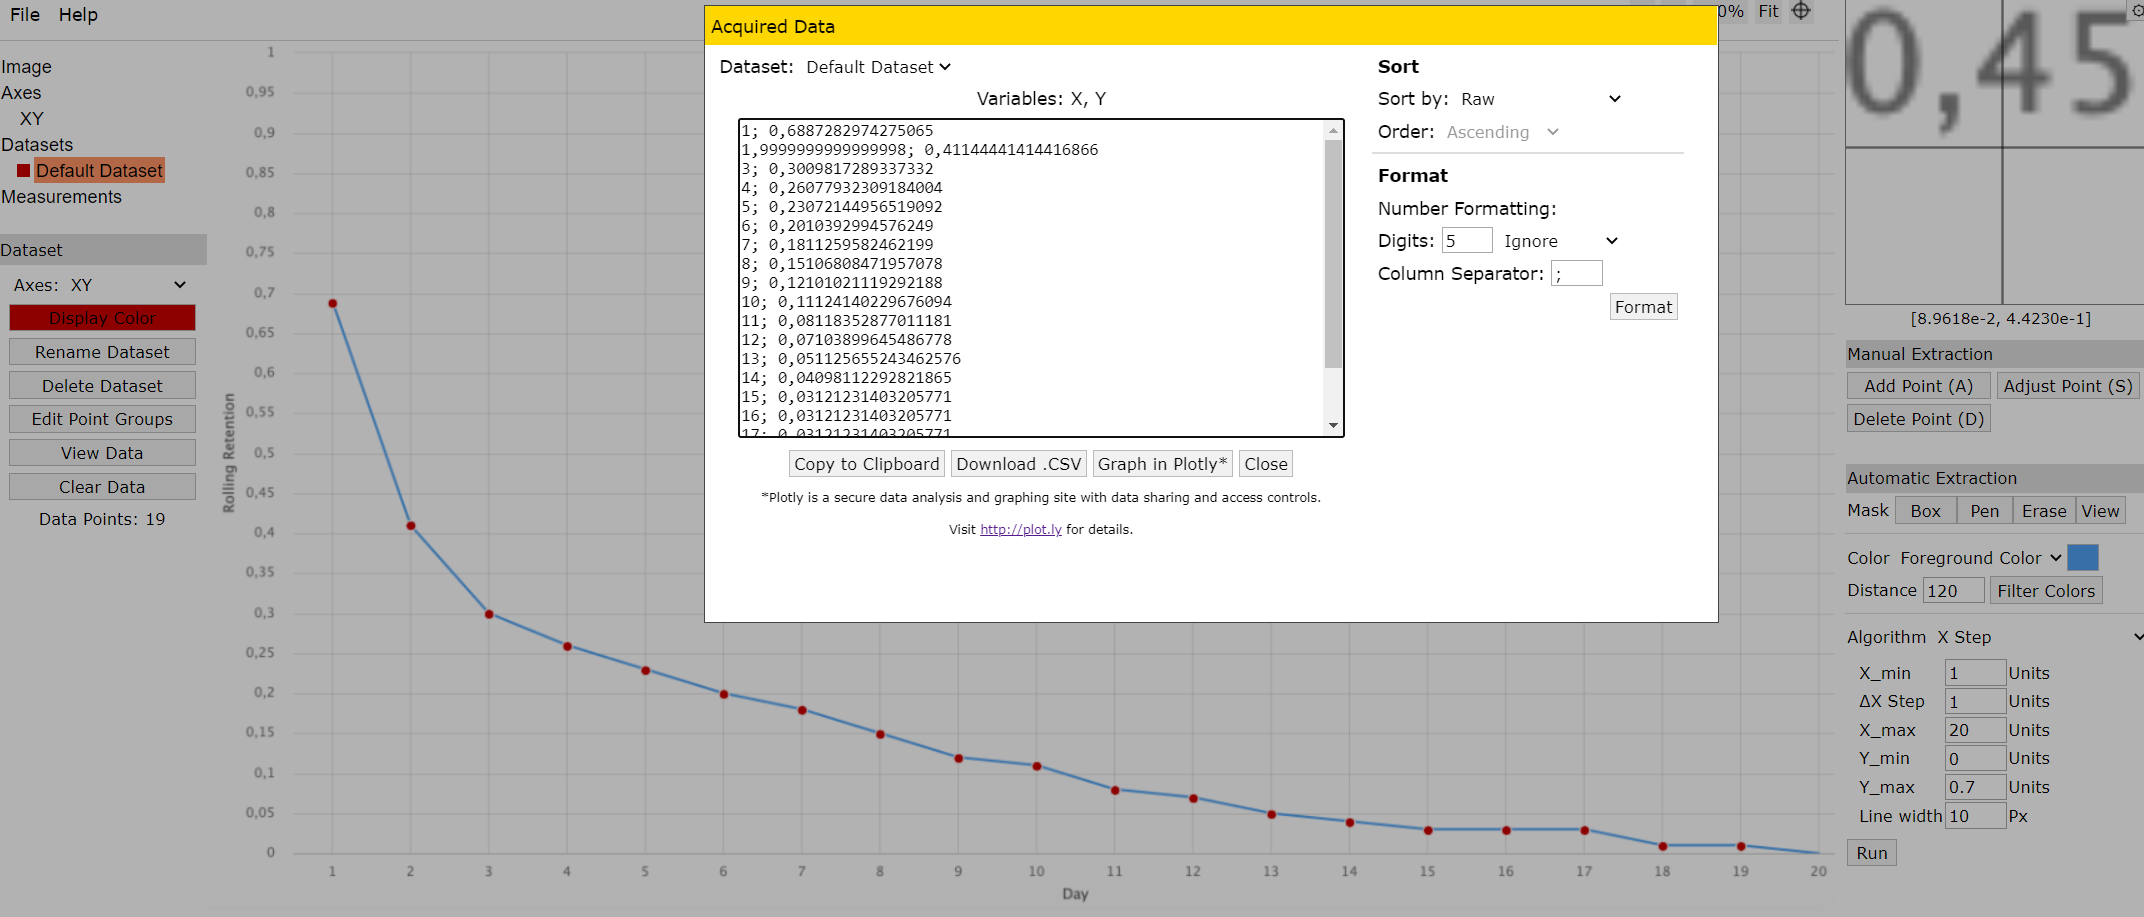

In [11]:
data = pd.read_csv('finnish_dawn.csv',header=None, decimal=',',delimiter=';', names=['day','active_share'])
data.head()

,day,active_share
0,1,0.688728
1,2,0.411444
2,3,0.300982
3,4,0.260779
4,5,0.230721


In [12]:
# Определим долю пользователей ушедших после каждого из дней 
data['abandon']= data.active_share.diff(-1).fillna(data.active_share)
data

,day,active_share,abandon
0,1,0.688728,0.277284
1,2,0.411444,0.110463
2,3,0.300982,0.040202
3,4,0.260779,0.030058
4,5,0.230721,0.029682
5,6,0.201039,0.019913
6,7,0.181126,0.030058
7,8,0.151068,0.030058
8,9,0.121010,0.009769
9,10,0.111241,0.030058


In [13]:
# Рассчитаем средний Lifetime
Lifetime = (data.day*data.abandon).sum()
print(Lifetime)
print(round(Lifetime))

3.018704359
3


# B. Пользовательский лог

*Мы хотим построить модель рекомендации товаров с помощью пользовательского лога. Но признаки пользователей оказались разбросаны по 20 файлам, каждый из которых содержит два столбца: ID пользователя и значение признака.*

*Подсчитайте количество пользователей, у которых заполнены хотя бы 50% всех полей признаков.*

*Формат ввода*
*Условия на файлы: - Все файлы отсортированы по ID пользователя. - ID пользователя уникальны в файлах с признаками и не уникальны в логе.*

*Пример пользовательского лога log.csv: 111,view 111,purchase 222,view*

*Пример файла с признаками feature_1.csv: 111,1.0 333.0.55*

In [14]:
log = pd.read_csv('feature_files\log.csv',header=None,delimiter=',', names=['User_ID','action'])
log.head()

,User_ID,action
0,100,view
1,101,view
2,101,view
3,101,view
4,101,purchase


In [15]:
# Из лога получим список пользователей
users = pd.DataFrame(log.User_ID.unique(),columns=['User_ID']).set_index('User_ID')

# И добавим признаки
for feature_n in range(1, 21):
    
    feature_path = 'feature_files\\feature_' + str(feature_n) +'.csv'
    feature = pd.read_csv(feature_path,header=None,delimiter=',',index_col=0,names=['User_ID','feature_'+str(feature_n)])
    users = users.join(feature)  
    
users

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
User_ID,,,,,,,,,,,,,,,,,,,,
100,1181.968054,456.352191,9.427243,48.777727,NaN,NaN,50.522812,NaN,NaN,5.578167,2.064689,NaN,NaN,3.416031,29.029847,4960.121602,5426.528210,6222.788718,74.791830,2.179951
101,5996.517509,16.441583,NaN,33.278699,805.717154,0.230103,88.822875,1196.577689,NaN,6.478839,9.603035,NaN,NaN,5.950621,9.720958,NaN,7964.523286,NaN,7.709466,6.956862
102,9079.605661,853.921305,932.653249,NaN,681.923908,0.505911,NaN,2075.486992,NaN,7.509210,5.500306,NaN,0.490259,6.952456,53.581757,1691.985831,2410.502253,NaN,NaN,0.017770
103,9217.686409,397.455567,14.586806,47.116374,NaN,0.283457,46.490824,7936.908996,0.043535,8.096796,NaN,NaN,0.185532,8.481475,NaN,8492.408550,9917.080489,13.413598,58.112948,3.293579
104,NaN,158.848102,476.775234,57.885627,NaN,0.895338,14.704710,6946.647629,0.443037,8.371545,6.824114,10.156172,0.960983,5.891555,NaN,NaN,NaN,NaN,NaN,8.670554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,6178.533200,740.983210,NaN,NaN,NaN,0.308196,24.638798,7713.183743,0.452172,0.037443,NaN,23.320749,0.240861,1.394708,80.649051,NaN,6650.383041,NaN,44.397726,2.867788
995,NaN,593.299039,870.879799,NaN,124.793603,NaN,63.884825,NaN,0.288055,8.450785,2.942074,5.038767,0.516351,NaN,28.496001,NaN,NaN,8425.747358,22.465137,0.052199
996,4554.256473,NaN,NaN,14.160266,NaN,0.824070,NaN,NaN,0.222716,NaN,NaN,34.810336,NaN,9.393522,NaN,5441.765851,6404.383113,9158.406543,31.959328,9.863387


In [16]:
# Считаем количество пользователей, у которых заполнены хотя бы 50% всех полей признаков.
(users.count(axis=1) >= 10).sum()

870